In [1]:
from data.pemrosesanData import ambilData, labelEncode, MinMax, cetak_kolom_kategorikal
from algoritma.KNN import K, splitDataset, jarakTerdekat, hasilJarakTerdekat, acakK, Klasifikasi, semuaPrediksi
from pengujian.metrik_evaluasi import Akurasi, Presisi, Recall, F1, CM, nilaiCM, Metrik, visualisaiMetrik, maksMetrik, visualisasiCM
import numpy as np
import pandas as pd

In [2]:
dataset = ambilData() # Ambil dataset
print("\t\tHasil Import Dataset")
print(dataset) # menampilkan dataset

		Hasil Import Dataset
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0   

In [3]:
print("\t\tInformasi Kolom dataset")
dataset.info() #informasi kolom dataset

		Informasi Kolom dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
print("\t\tInformasi Kolom kategorikal")
cetak_kolom_kategorikal(dataset) # menampilkan informasi kolom kategorikal (object)

		Informasi Kolom kategorikal
Kolom : Sex
		 M 	:  725  data
		 F 	:  193  data
	 2  Nilai
Kolom : ChestPainType
		 ASY 	:  496  data
		 NAP 	:  203  data
		 ATA 	:  173  data
		 TA 	:  46  data
	 4  Nilai
Kolom : RestingECG
		 Normal 	:  552  data
		 LVH 	:  188  data
		 ST 	:  178  data
	 3  Nilai
Kolom : ExerciseAngina
		 N 	:  547  data
		 Y 	:  371  data
	 2  Nilai
Kolom : ST_Slope
		 Flat 	:  460  data
		 Up 	:  395  data
		 Down 	:  63  data
	 3  Nilai


In [5]:
dataset = labelEncode(dataset) # encoding nilai kategorikal menjadi numerikal
print ("\t\tDataset Yang Telah Diencoding")
print (dataset) # menampilkan dataset yang telah diencoding

		Dataset Yang Telah Diencoding
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  Exercis

In [6]:
dataset = MinMax(dataset) # Normalisasi dataset
print ("\t\tDataset Yang Telah dinormalisasi")
print (dataset) # menampilkan dataset yang telah dinormalisasi

		Dataset Yang Telah dinormalisasi
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69         0.29        0.0         0.5   

    

In [7]:
acak_K = acakK()
maks_K = np.max(acak_K)
print("nilai k yang dihasilkan :", acak_K)

nilai k yang dihasilkan : [8, 3, 9, 4, 7]


In [8]:
kolom_target = 'HeartDisease' #membuang kolom HeartDisease , digunakan sebagai target
X_train, X_test, y_train, y_test = splitDataset(dataset, kolom_target, test_size=0.2, random_state=42)

In [9]:
print("Data Training\n") 
print(X_train) # menampilkan data training

Data Training

      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
795  0.29  1.0           0.67       0.60         0.40        1.0         0.5   
25   0.16  1.0           0.67       0.65         0.35        0.0         0.5   
84   0.57  1.0           0.00       0.75         0.35        1.0         0.5   
10   0.18  0.0           0.67       0.65         0.35        0.0         0.5   
344  0.47  1.0           0.00       0.60         0.00        1.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
106  0.41  0.0           0.00       0.60         0.42        0.0         1.0   
270  0.35  1.0           0.00       0.60         0.37        0.0         0.5   
860  0.65  1.0           0.00       0.65         0.42        0.0         0.5   
435  0.65  1.0           0.00       0.76         0.00        0.0         1.0   
102  0.24  0.0           0.00       0.75         0.65        0.0         0.5   

     MaxHR  ExerciseAngi

In [10]:
'''
nama_file = "/home/ucup/projects/python/hans/data/dataset/laporan.xlsx"
with pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:
    X_train.to_excel(writer, sheet_name="Training", index=True)
'''

'\nnama_file = "/home/ucup/projects/python/hans/data/dataset/laporan.xlsx"\nwith pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:\n    X_train.to_excel(writer, sheet_name="Training", index=True)\n'

In [11]:
print("Data Testing\n") 
print(X_test) # menampilkan data testing

Data Testing

      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
668  0.71  0.0           0.33       0.70         0.32        0.0         0.5   
30   0.51  1.0           0.67       0.72         0.86        0.0         0.5   
377  0.76  1.0           0.00       0.80         0.00        1.0         1.0   
535  0.57  1.0           0.00       0.65         0.00        0.0         0.0   
807  0.53  1.0           0.33       0.54         0.51        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
211  0.45  0.0           0.67       0.70         0.48        0.0         0.5   
745  0.71  0.0           0.00       0.54         0.45        0.0         0.5   
584  0.73  1.0           0.00       0.70         0.40        1.0         1.0   
878  0.43  1.0           0.33       0.65         0.44        0.0         0.5   
451  0.73  1.0           0.00       0.72         0.00        0.0         1.0   

     MaxHR  ExerciseAngin

In [12]:
'''
with pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:
    X_test.to_excel(writer, sheet_name="Testing", index=True)
'''

'\nwith pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:\n    X_test.to_excel(writer, sheet_name="Testing", index=True)\n'

In [13]:
#mencari ketetanggan terdekat
terdekat, indeks = jarakTerdekat(X_test, X_train, y_train, maks_K)

In [14]:
#mencari ketetanggan terdekat
terdekat, indeks = jarakTerdekat(X_test, X_train, y_train, maks_K)
# Melakukan klasifikasi menggunakan kNN untuk setiap nilai k
y_pred = semuaPrediksi(acak_K, X_train, y_train, X_test)
# mencari jarak terdekat
hasil_jarak_terdekat = hasilJarakTerdekat(X_test, y_train, terdekat, indeks)    
#konversi data frame
df_hasil_jarak_terdekat = pd.DataFrame(hasil_jarak_terdekat, columns=["Testing", "Training", "Jarak", "Kelas"])
print(df_hasil_jarak_terdekat)

      Testing  Training  Jarak  Kelas
0         668        13   0.27      0
1         668       403   0.30      0
2         668       248   0.31      0
3         668        41   0.33      0
4         668       197   0.33      0
...       ...       ...    ...    ...
1651      451       277   0.22      1
1652      451       607   0.30      1
1653      451       475   0.33      1
1654      451       278   0.37      1
1655      451       326   0.38      1

[1656 rows x 4 columns]


In [15]:
'''
with pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:
    df_hasil_jarak_terdekat.to_excel(writer, sheet_name="Jarak", index=True)
'''

'\nwith pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:\n    df_hasil_jarak_terdekat.to_excel(writer, sheet_name="Jarak", index=True)\n'

In [16]:
kolom_prediksi = ["K" + str(val) for val in acak_K] # Membuat dictionary kolom
prediksi = pd.DataFrame(np.transpose(y_pred), columns=kolom_prediksi) # Membuat dataframe
klasifikasi = Klasifikasi(X_test, prediksi, y_test) # Hasil klasifikasi
print(klasifikasi)

       #  target  K8  K3  K9  K4  K7
0    668       0   0   0   0   0   0
1     30       1   1   1   1   1   1
2    377       1   1   1   1   1   1
3    535       1   1   1   1   1   1
4    807       0   0   0   0   0   0
..   ...     ...  ..  ..  ..  ..  ..
179  211       1   1   0   1   0   1
180  745       1   1   1   1   1   1
181  584       1   1   1   1   1   1
182  878       0   0   0   0   0   0
183  451       1   1   1   1   1   1

[184 rows x 7 columns]


In [17]:
'''
nama_file = "/home/ucup/projects/python/hans/data/dataset/laporan.xlsx"
with pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:
    klasifikasi.to_excel(writer, sheet_name="klasifikasi", index=True)
'''

'\nnama_file = "/home/ucup/projects/python/hans/data/dataset/laporan.xlsx"\nwith pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:\n    klasifikasi.to_excel(writer, sheet_name="klasifikasi", index=True)\n'

In [18]:
akurasi, presisi, recall, f1, cm = Metrik(y_test, prediksi)

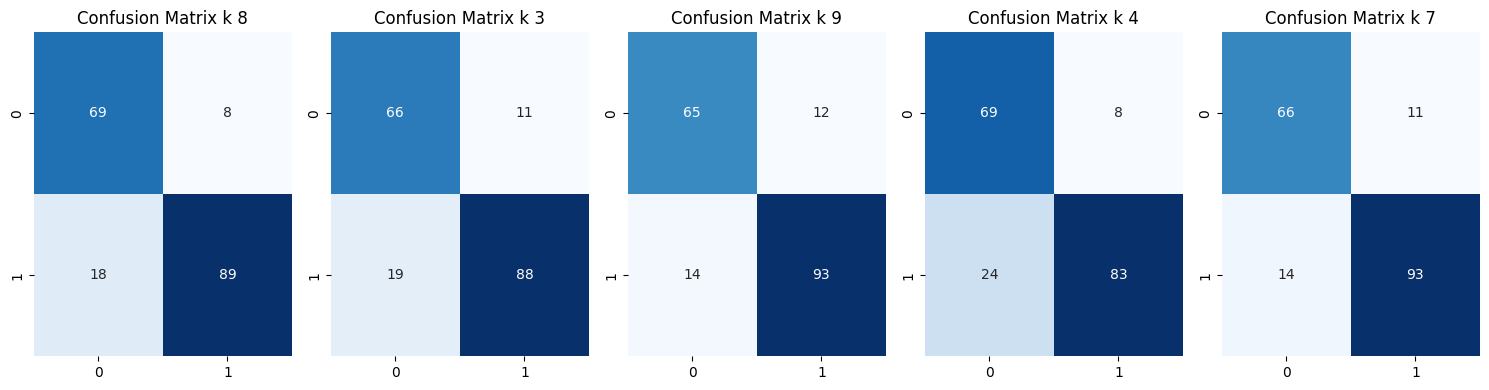

In [19]:
visualisasiCM(cm, acak_K)

In [20]:
TN, FP, FN, TP, T, F = nilaiCM(cm)

In [21]:
nilai_cm = pd.DataFrame({'k': acak_K, 'TN': TN, 'FP': FP, 'FN': FN, 'TP': TP, 'T': T, 'F': F})

In [22]:
print("Nilai prediksi berdasarkan matriks konfusi")
print(nilai_cm)

Nilai prediksi berdasarkan matriks konfusi
   k  TN  FP  FN  TP    T   F
0  8  69   8  18  89  158  26
1  3  66  11  19  88  154  30
2  9  65  12  14  93  158  26
3  4  69   8  24  83  152  32
4  7  66  11  14  93  159  25


In [23]:
'''
with pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:
    nilai_cm.to_excel(writer, sheet_name="CM", index=True)
'''

'\nwith pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:\n    nilai_cm.to_excel(writer, sheet_name="CM", index=True)\n'

In [24]:
print("Mengurutkan K berdasarkan nilai True terbaik")
print(nilai_cm.sort_values(by='T', ascending=False))

Mengurutkan K berdasarkan nilai True terbaik
   k  TN  FP  FN  TP    T   F
4  7  66  11  14  93  159  25
0  8  69   8  18  89  158  26
2  9  65  12  14  93  158  26
1  3  66  11  19  88  154  30
3  4  69   8  24  83  152  32


In [25]:
metrik = pd.DataFrame({'k': acak_K,'akurasi': akurasi, 'presisi': presisi, 'recall': recall, 'f1': f1})
print(metrik)

   k  akurasi  presisi  recall    f1
0  8     0.86     0.92    0.83  0.87
1  3     0.84     0.89    0.82  0.85
2  9     0.86     0.89    0.87  0.88
3  4     0.83     0.91    0.78  0.84
4  7     0.86     0.89    0.87  0.88


In [26]:
'''
with pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:
    metrik.to_excel(writer, sheet_name="metrik", index=True)
'''

'\nwith pd.ExcelWriter(nama_file, engine="openpyxl", mode="a") as writer:\n    metrik.to_excel(writer, sheet_name="metrik", index=True)\n'

In [27]:
#maksMetrik(metrik)
urut_akurasi = metrik[['k','akurasi']].sort_values(by='akurasi', ascending=False)
urut_presisi = metrik[['k','presisi']].sort_values(by='presisi', ascending=False)
urut_recall = metrik[['k','recall']].sort_values(by='recall', ascending=False)
urut_f1 = metrik[['k','f1']].sort_values(by='f1', ascending=False)
print("\takurasi terbaik")
print(urut_akurasi.T)
print("\tpresisi terbaik")
print(urut_presisi.T)
print("\trecall terbaik")
print(urut_recall.T)
print("\tf1 terbaik")
print(urut_f1.T)

	akurasi terbaik
            0     2     4     1     3
k        8.00  9.00  7.00  3.00  4.00
akurasi  0.86  0.86  0.86  0.84  0.83
	presisi terbaik
            0     3     1     2     4
k        8.00  4.00  3.00  9.00  7.00
presisi  0.92  0.91  0.89  0.89  0.89
	recall terbaik
           2     4     0     1     3
k       9.00  7.00  8.00  3.00  4.00
recall  0.87  0.87  0.83  0.82  0.78
	f1 terbaik
       2     4     0     1     3
k   9.00  7.00  8.00  3.00  4.00
f1  0.88  0.88  0.87  0.85  0.84


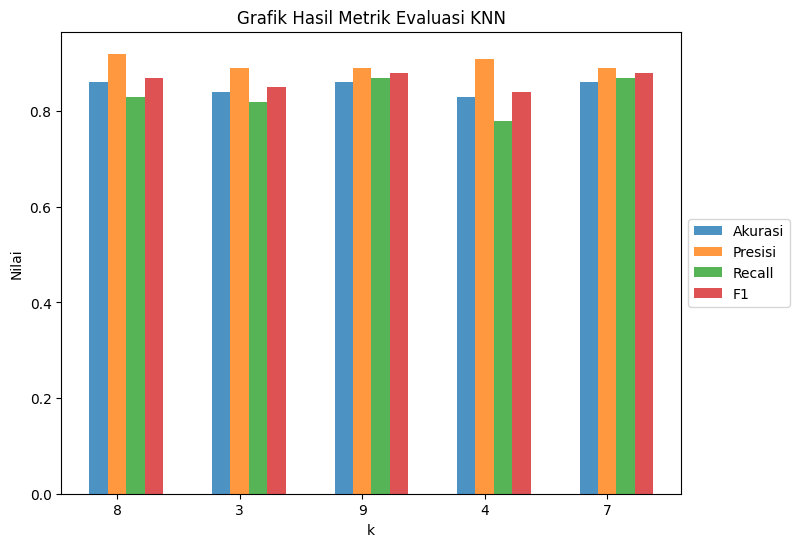

In [28]:
visualisaiMetrik(metrik)